Step #0: Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step #1: Import the dataset

In [3]:
Tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [4]:
Tshirt.head(5)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [5]:
Tshirt.tail(5)

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


Step #2: Create Testing and Training Dataset

In [12]:
X =Tshirt.iloc[: , 0:2].values

In [13]:
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [10]:
Y = Tshirt.iloc[:,2].values

In [11]:
Y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [16]:
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25,random_state = 5)

Step #3: Model Training

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors  = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Step #4: Model Testing

In [28]:
Y_pred = classifier.predict(X_test)

In [29]:
Y_pred

array([1, 1, 0, 1, 0], dtype=int64)

In [30]:
Y_test

array([1, 1, 0, 1, 0], dtype=int64)

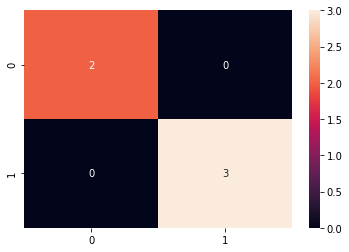

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot= True)

Step #5: Training/Testing Results Visualization

In [40]:
#Visualizing Testing set Results
from matplotlib.colors import ListedColormap
X_grid, Y_grid = X_test, Y_test
X1 = np.meshgrid(np.arange(start = X_grid[: ,0].min() - 1, stop = X_grid[:, 0]).max() + 1, step = 0.01)
X2 = np.meshgrid(np.arange(start = X_grid[: ,1].min() - 1, stop = X_grid[:, 1]).max() + 1, step = 0.01)

plt.contourf(X1, X2, classifier.predict(np.array[X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75,
cmap = ListedColormap(('red ', 'green'))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set ==j, 0], X_set[Y_set ==j ,1],c = ListedColormap('red', 'green') (i), label = j)
                
plt.title('Testing Dataset)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
#Visualizing Training set Results
from matplotlib.colors import ListedColormap
X_grid, Y_grid = X_train, Y_train
X1 = np.meshgrid(np.arange(start = ((X_grid[: ,0].min() - 1).any()), stop = ((X_grid[:, 0]).max() + 1).any()), step = 0.01)
X2 = np.meshgrid(np.arange(start = ((X_grid[: ,1].min() - 1).any()), stop = ((X_grid[:, 1]).max() + 1).any()), step = 0.01)

plt.contourf(X1, X2, classifier.predict(np.array[X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75,
cmap = ListedColormap(('red ', 'green'))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_grid)):
    plt.scatter(X_set[Y_set ==j, 0], X_set[Y_set ==j ,1],c = ListedColormap('red', 'green') (i), label = j)
                
plt.title('Testing Dataset)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.